In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Employee.csv')
df.head(5)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [3]:
df.shape

(148, 6)

In [4]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [5]:
df.nunique()

,0
Company,6
Age,29
Salary,40
Place,11
Country,1
Gender,2


In [6]:
#Handling missing values
df['Age']=df['Age'].fillna(df['Age'].median())
df['Salary']=df['Salary'].fillna(df['Salary'].median())
df['Country']=df['Country'].fillna(df['Country'].mode()[0])
df['Place']=df['Place'].fillna(df['Place'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Company']=df['Company'].fillna(df['Company'].mode()[0])

In [7]:
df.isna().sum()

,0
Company,0
Age,0
Salary,0
Place,0
Country,0
Gender,0


In [8]:
df.shape

(148, 6)

In [9]:
df[df.duplicated()]

,Company,Age,Salary,Place,Country,Gender
84,CTS,43.0,5000.0,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,32.5,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [10]:
#Deleting duplicte values
df.drop_duplicates(inplace=True)


In [11]:
q1,q2,q3=np.percentile(df['Salary'],[25,50,75])
print(q1,q2,q3)

3045.0 5000.0 7084.0


In [12]:
iqr=q3-q1
print(iqr)

4039.0


In [44]:
lower_bound=q1-(1.5*iqr)
print('lower_bound:',lower_bound)
upper_bound=q3+(1.5*iqr)
print('upper_bound:',upper_bound)

lower_bound: 3.5
upper_bound: 55.5


Since the minimum value in salary is 1089and maximum value is 9876 and the lower bound is between -3013 and upperbound is 13000 there is no outlier in the salary data





In [14]:
outlier=[]
for i in df['Salary']:
    if i<lower_bound or i>upper_bound:
        outlier.append(i)
print(outlier)

[]


In [15]:
q1,q2,q3=np.percentile(df['Age'],[25,50,75])
print(q1,q2,q3)
iqr=q3-q1
print(iqr)
lower_bound=q1-(1.5*iqr)
print('lower bound:',lower_bound)
upper_bound=q3+(1.5*iqr)
print('upper bound:',upper_bound)


23.0 32.5 36.0
13.0
lower bound: 3.5
upper bound: 55.5


<Axes: ylabel='Age'>

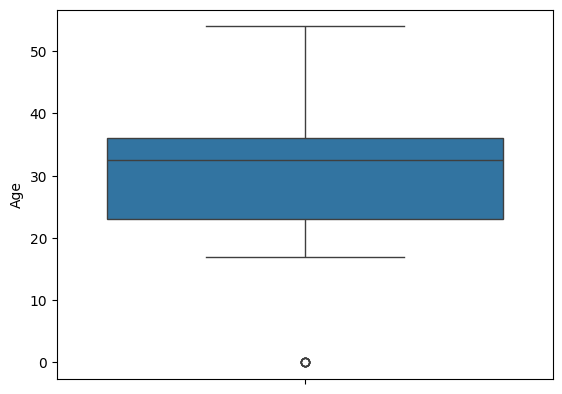

In [16]:
import seaborn as sns
sns.boxplot(df['Age'])

In [17]:
df['Age'].value_counts()

,count
Age,
32.5,17
22.0,15
33.0,13
44.0,10
34.0,8
23.0,8
32.0,7
21.0,7
35.0,6


In [18]:
outlier=[]
for i in df['Age']:
    if i<lower_bound or i>upper_bound:
        outlier.append(i)
print(outlier)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In the Age column, the value 0 is detected as an outlier. Since this dataset represents employee ages and the lower bound is 3.5, it does not make logical sense to apply flooring. Therefore, instead of replacing the outlier using the lower bound, I will impute it with the median age.

In [19]:
from sklearn.impute import SimpleImputer


In [20]:
df['Age'] = df['Age'].replace(0, np.nan)


In [21]:
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])


In [22]:
df['Age'].value_counts()

,count
Age,
32.5,23
22.0,15
33.0,13
44.0,10
34.0,8
23.0,8
21.0,7
32.0,7
35.0,6


In [23]:
df.isna().sum()

,0
Company,0
Age,0
Salary,0
Place,0
Country,0
Gender,0


In [24]:
#Filter the data with age >40 and salary<5000 Plot the chart with age and salary Count the number of people from each place and represent it visually
df1=df.loc[(df['Age']>40)&(df['Salary']<5000)]
df1


,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


In [25]:
df['Company'].value_counts()

,count
Company,
TCS,60
Infosys,43
CTS,35
Tata Consultancy Services,2
Congnizant,2
Infosys Pvt Lmt,2


In [26]:
df.replace({'Tata Consultancy Services': 'TCS'}, inplace=True)
df.replace({'Infosys Pvt Lmt':'Infosys'},inplace=True)
df.replace({'Congnizant':'CTS'},inplace=True)


In [27]:
df1.shape

(15, 6)

In [29]:
df['Place'].value_counts()

,count
Place,
Mumbai,48
Calcutta,32
Chennai,14
Delhi,14
Cochin,13
Noida,8
Hyderabad,8
Podicherry,3
Pune,2


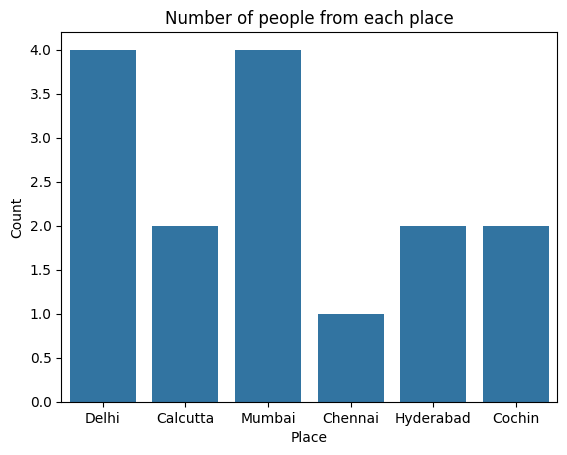

In [30]:
sns.countplot(x='Place',data=df1)
plt.title('Number of people from each place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

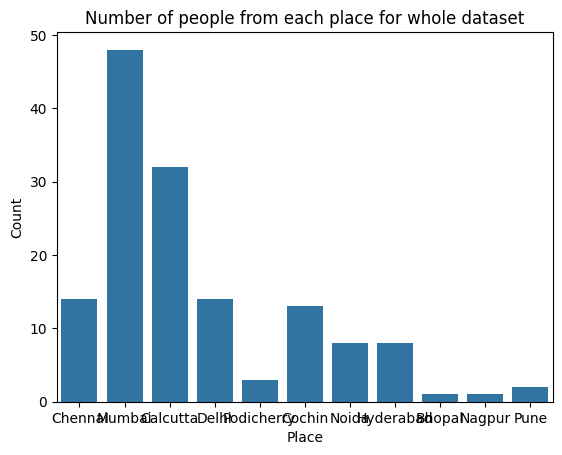

In [31]:
sns.countplot(x='Place',data=df)
plt.title('Number of people from each place for whole dataset')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

In [32]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
encoded=ohe.fit_transform(df[['Company', 'Place', 'Country']])
encoded_df=pd.DataFrame(encoded.toarray(),columns=ohe.get_feature_names_out())
encoded_df.head()

,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
encoded_df.shape

(144, 15)

In [34]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [35]:
encoded_df.columns

Index(['Company_CTS', 'Company_Infosys', 'Company_TCS', 'Place_Bhopal',
       'Place_Calcutta', 'Place_Chennai', 'Place_Cochin', 'Place_Delhi',
       'Place_Hyderabad', 'Place_Mumbai', 'Place_Nagpur', 'Place_Noida',
       'Place_Podicherry', 'Place_Pune', 'Country_India'],
      dtype='object')

In [36]:
encoded_df = encoded_df.reset_index(drop=True)
df = df.reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)


In [37]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender', 'Company_CTS',
       'Company_Infosys', 'Company_TCS', 'Place_Bhopal', 'Place_Calcutta',
       'Place_Chennai', 'Place_Cochin', 'Place_Delhi', 'Place_Hyderabad',
       'Place_Mumbai', 'Place_Nagpur', 'Place_Noida', 'Place_Podicherry',
       'Place_Pune', 'Country_India'],
      dtype='object')

In [38]:
df2 = df.drop(['Company', 'Place', 'Country'], axis=1)
df2

,Age,Salary,Gender,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,20.0,5000.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,30.0,5000.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,35.0,2300.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,40.0,3000.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,23.0,4000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,22.0,8202.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
140,33.0,9024.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141,44.0,4034.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
142,33.0,5034.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [39]:
df

,Company,Age,Salary,Place,Country,Gender,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,...,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,TCS,20.0,5000.0,Chennai,India,0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Infosys,30.0,5000.0,Mumbai,India,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,TCS,35.0,2300.0,Calcutta,India,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Infosys,40.0,3000.0,Delhi,India,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TCS,23.0,4000.0,Mumbai,India,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
140,TCS,33.0,9024.0,Calcutta,India,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141,Infosys,44.0,4034.0,Delhi,India,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
142,TCS,33.0,5034.0,Mumbai,India,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [40]:
df.isna().sum()

,0
Company,0
Age,0
Salary,0
Place,0
Country,0
Gender,0
Company_CTS,0
Company_Infosys,0
Company_TCS,0
Place_Bhopal,0


In [43]:
#After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.
from sklearn.preprocessing import StandardScaler,MinMaxScaler
s=StandardScaler()
df['Age']=s.fit_transform(df[['Age']])
m=MinMaxScaler()
df['Salary']=m.fit_transform(df[['Salary']])
df

,Company,Age,Salary,Place,Country,Gender,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,...,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,TCS,-1.475994,0.445089,Chennai,India,0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Infosys,-0.257633,0.445089,Mumbai,India,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,TCS,0.351548,0.137817,Calcutta,India,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Infosys,0.960729,0.217480,Delhi,India,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TCS,-1.110486,0.331285,Mumbai,India,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Infosys,-1.232322,0.809491,Mumbai,India,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
140,TCS,0.107876,0.903039,Calcutta,India,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141,Infosys,1.448073,0.335154,Delhi,India,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
142,TCS,0.107876,0.448959,Mumbai,India,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [47]:
df3=df.drop(['Company','Place','Country'],axis=1)
df3

,Age,Salary,Gender,Company_CTS,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,-1.475994,0.445089,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.257633,0.445089,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.351548,0.137817,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.960729,0.217480,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.110486,0.331285,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,-1.232322,0.809491,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
140,0.107876,0.903039,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141,1.448073,0.335154,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
142,0.107876,0.448959,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [48]:
df3.columns

Index(['Age', 'Salary', 'Gender', 'Company_CTS', 'Company_Infosys',
       'Company_TCS', 'Place_Bhopal', 'Place_Calcutta', 'Place_Chennai',
       'Place_Cochin', 'Place_Delhi', 'Place_Hyderabad', 'Place_Mumbai',
       'Place_Nagpur', 'Place_Noida', 'Place_Podicherry', 'Place_Pune',
       'Country_India'],
      dtype='object')